## Q1 PCA From Scratch

## Import Libraries

In [0]:
from PIL import Image
import numpy as np
import sys
import os
import csv
import pandas as pd

# Making Filelist containing names of all Files

In [0]:
def FileList(myDir, format='.jpg'):
    fileList = []
    ext=".jpg"
    for root,dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(name,ext)
                fileList.append(name)
    return fileList

In [0]:
filelist=FileList("/content/drive/My Drive/Dataset/")
filelist.sort()

# converting images into grayform and representing images into matrix

In [0]:
imageset=[]
for file in filelist:
    imgfile = Image.open("/content/drive/My Drive/Dataset/"+file)
    width, height = imgfile.size  
    left = 6
    top = height / 4
    right = 174
    bottom = 3 * height / 4 
    im1 = imgfile.crop((left, top, right, bottom)) 
    newsize = (64,64) 
    im1 = im1.resize(newsize) 
#     # Make image Greyscale
    im1 = im1.convert('L')
    im1.show()
    value = np.asarray(im1.getdata(), dtype=np.int)
    value = value.flatten()
    imageset.append(value)

In [0]:
#converting into numpy array
df=np.asarray(imageset)
print(df)
print(df.shape)

[[188 193 196 ... 126 148 142]
 [ 66  89  99 ...  92  95  92]
 [ 21  18  20 ... 164 164 168]
 ...
 [ 35  32  31 ...  71  88 114]
 [ 68  41  29 ... 164 153 136]
 [ 59  57  56 ...  45  56  77]]
(520, 4096)


In [0]:
#Normalising Data using Standard Scaler
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(df)
print(std_data.shape)
print(std_data)

(520, 4096)
[[ 1.54302733  1.60024926  1.61324287 ... -0.06215763  0.41155578
   0.25999603]
 [-0.45207414 -0.10658229  0.0090008  ... -0.78753509 -0.75153664
  -0.8632836 ]
 [-1.18797223 -1.27182306 -1.29754686 ...  0.74855836  0.76267802
   0.84410144]
 ...
 [-0.95902616 -1.04205727 -1.1156225  ... -1.23556235 -0.90515262
  -0.36904056]
 [-0.41936756 -0.8943507  -1.14869965 ...  0.74855836  0.52128148
   0.12520248]
 [-0.56654718 -0.63176123 -0.70215805 ... -1.79026276 -1.60739711
  -1.20026749]]


# Covariance Matrix

In [0]:
df=std_data
covarMat=np.cov(df.T)
print(covarMat.shape)
print(covarMat)

(4096, 4096)
[[ 1.00192678  0.96409407  0.9067932  ... -0.06938033 -0.05578848
  -0.03637339]
 [ 0.96409407  1.00192678  0.97260992 ... -0.07013523 -0.057902
  -0.03498668]
 [ 0.9067932   0.97260992  1.00192678 ... -0.06543768 -0.05252324
  -0.0281183 ]
 ...
 [-0.06938033 -0.07013523 -0.06543768 ...  1.00192678  0.95882463
   0.88433389]
 [-0.05578848 -0.057902   -0.05252324 ...  0.95882463  1.00192678
   0.9614479 ]
 [-0.03637339 -0.03498668 -0.0281183  ...  0.88433389  0.9614479
   1.00192678]]


# Computing Eigen Values and Eigen Vectors

In [0]:
from scipy.linalg import eigh

In [0]:
values, vectors=eigh(covarMat)

In [0]:
print(values)

[-1.19251824e-12 -5.84105843e-13 -3.38485263e-13 ...  2.48551230e+02
  5.45667356e+02  1.54880113e+03]


In [0]:
print(vectors)

[[ 0.08427324  0.09281931 -0.06063673 ...  0.01506904 -0.02188767
  -0.00853041]
 [-0.59606209 -0.44176983 -0.05540071 ...  0.01534095 -0.02239255
  -0.00897891]
 [ 0.55254171 -0.45716883  0.02734108 ...  0.01463272 -0.02256451
  -0.0094989 ]
 ...
 [-0.00084465 -0.01957545  0.01046597 ...  0.01090589  0.0208769
  -0.00945894]
 [-0.0024928  -0.01322022 -0.01493542 ...  0.01338194  0.02073632
  -0.01005814]
 [-0.00718417  0.02177467  0.02096824 ...  0.0162763   0.02071354
  -0.01079312]]


#Sorted eigen values in Descending Order

In [0]:
idx= np.argsort(values)
idx = idx[::-1]
eigvec = vectors[:,idx]
eigval = values[idx]
print(eigval)

[ 1.54880113e+03  5.45667356e+02  2.48551230e+02 ... -3.38485263e-13
 -5.84105843e-13 -1.19251824e-12]


# Finding Max-variance rotio varying number of Principle Components

In [0]:
total=sum(eigval)
eigcum=np.array(np.cumsum(eigval))
computed=[0]*eigvec.shape[0]
for i in range(0,eigvec.shape[0]):
  computed[i]=eigcum[i]/total

# Plotting Graph to show variance for different number of principle components

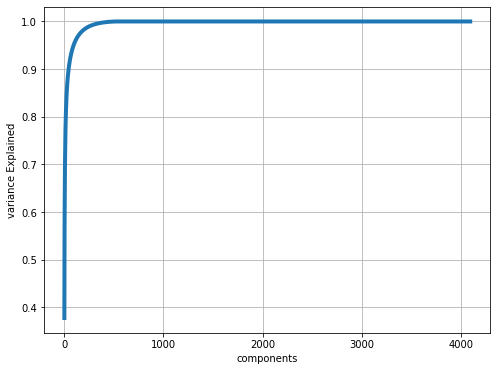

In [0]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(8,6))
plt.clf()
y=[]
for i in range(0,4096):
  y.append(i)
plt.plot(y,computed,linewidth=4)

plt.grid()
plt.xlabel("components")
plt.ylabel("variance Explained")
plt.show()

# Considering top 100 PCA Components

In [0]:
#computed variance for top 100 eigen values
print(computed[100])
subeigvec=eigvec[:,:100]
print(subeigvec.shape)

0.95400449141152
(4096, 100)


In [0]:
print(df.shape)

(520, 4096)


In [0]:
newdata=np.dot(df,subeigvec)
# reconstruction of newdataset in original dimension
newdata=np.dot(newdata,subeigvec.T)

In [0]:
print(newdata.shape)

(520, 4096)


# Before applying PCA

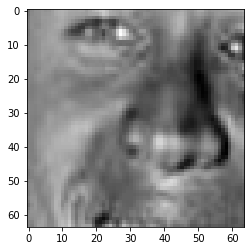

In [0]:
idx=1
grid_data=df[idx].reshape(64,64)
plt.imshow(grid_data,interpolation='None',cmap='gray')
plt.show()

#After Applying PCA

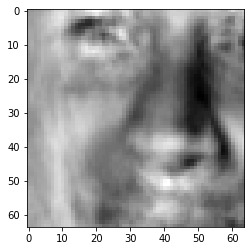

In [0]:
idx=1
grid_data=newdata[idx].reshape(64,64)
plt.imshow(grid_data,interpolation='None',cmap='gray')
plt.show()

#Plotting Graph for Mean Squared Error

In [0]:
x=600
y=[]
for i in range(0,4):
    x=x-100
    eig_vec = eigvec[:, range(x)]
    score = np.dot(eig_vec.T, df.T)
    recon = np.dot(eig_vec, score)
    err=np.square(np.subtract(df,recon.T)).mean()
    y.append(err)

(4096, 500)
(4096, 400)
(4096, 300)
(4096, 200)


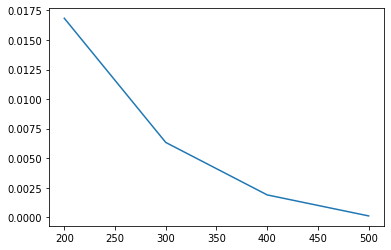

In [0]:
a=[500,400,300,200]
plt.plot(a,y)
plt.show()

# 1-D Scatter plot of one image

(4096, 1)


<function matplotlib.pyplot.show>

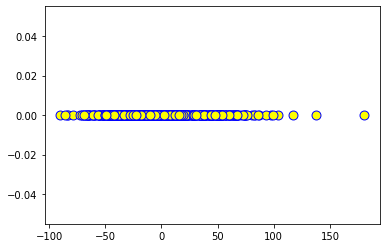

In [0]:
newvec= eigvec[:,:1]
print(np.shape(newvec)) 
score = np.dot(df, newvec)
y=[0]*520
plt.scatter(score[:,0],y,s=80,linewidth=1,facecolors='yellow',edgecolors='b')
plt.show

# 2-D Scatter Plot

(4096, 2)


<function matplotlib.pyplot.show>

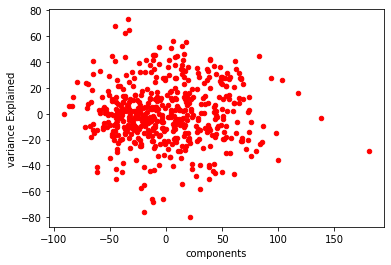

In [0]:
new_vec= eigvec[:, range(2)]
print(np.shape(new_vec)) 
score = np.dot(df, new_vec)
plt.scatter(score[:,0],score[:,1],s=20,linewidth=1,facecolors='r')
plt.xlabel("components")
plt.ylabel("variance Explained")
plt.show

# 3-D Scatter Plot

(4096, 3)


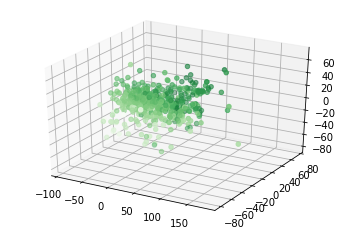

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
new_vec= eigvec[:, range(3)]
print(np.shape(new_vec)) 
score = np.dot(df, new_vec)
fig=plt.figure()
obj=fig.gca(projection='3d')
obj.scatter3D(np.real(score[:,0]),np.real(score[:,1]),np.real(score[:,2]),c=np.real(score[:,1]),cmap='Greens');